# Limiting CSR

In [8]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import tensorflow as tf
import pandas as pd

from spectrum import Spectrum, coat_spectrum

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## Read Raw Spectrum Data

In [10]:
def load_data(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    # Load the data using pandas
    data = pd.read_csv(file_path, delim_whitespace=True, header=None)
    
    # Convert the DataFrame to a NumPy array
    data_array = data.to_numpy()
    
    return data_array

import re
import numpy as np

# pre-compile the regex for performance
_exp_pat = re.compile(r'\*\^([+-]?\d+)')


def to_complex_array(obj_arr: np.ndarray) -> np.ndarray:
    """
    Convert an array of strings of the form
      - 'a+bi*I'
      - 'a-bi*I'
      - 'a*^b+ci*I'
      - 'a*^b-ci*I'
    into a numpy array of complex numbers.
    
    Parameters
    ----------
    obj_arr : np.ndarray
        Object-dtype (or string-dtype) array where each entry is a string
        like '0.5+1.2*I' or '-3.9*^-7-0.37*I'.
    
    Returns
    -------
    np.ndarray
        Array of dtype complex128 with the same shape as obj_arr.
    """
    str_arr = obj_arr.astype(str)
    
    def _convert_one(s: str) -> str:
        # 1) replace "*^b" → "eb"
        s = _exp_pat.sub(r'e\1', s)
        # 2) replace "*I" → "j"
        s = s.replace('*I', 'j')
        return s
    
    # vectorize across the array
    vect = np.vectorize(_convert_one, otypes=[str])
    j_arr = vect(str_arr)
    
    # finally cast to complex128
    return j_arr.astype(np.complex128)


## Plot Spectra

In [11]:
import numpy as np
import matplotlib.pyplot as plt

c_min = 0
c_max = 1

def plot_csr(filename, x_ticks=True, y_ticks=True, label=None):
    raw = load_data(filename)

    csr = to_complex_array(raw)[:,0]
    csr = Spectrum(csr, is_complex=True)
    csr_coat = coat_spectrum(csr, sigma=0.01)

    norm = np.sum(csr_coat) * 1/10000
    csr_density = csr_coat / norm

    fig, ax = plt.subplots(figsize=(5, 5))
    fig.tight_layout()

    # draw the heatmap and grab the AxesImage
    im = ax.imshow(
        csr_density,
        interpolation="gaussian",
        extent=(-1, 1, -1, 1),
        cmap="RdBu_r",
    )
    # set color limits on the image itself
    im.set_clim(0, 4)

    # draw the label in the top‐left, in axes coords:
    if label is not None:
        ax.text(
            0.02, 0.98,         # 2% from left, 98% from bottom
            label,
            transform=ax.transAxes,
            va="top",           # align text top
            ha="left",          # align text left
            fontsize=24,
            color="white",      # or choose a contrasting color
            bbox=dict(
                facecolor="black", 
                alpha=0.5,       # translucent background
                pad=2
            )
        )

    # ticks & labels
    if x_ticks:
        ax.set_xlabel("Re (z)", fontsize=24)
        ax.set_xticks(np.arange(-1, 1.1, 0.5))
        ax.tick_params(axis="x", labelsize=24)
    else:
        ax.set_xticks([])

    if y_ticks:
        ax.set_ylabel("Im (z)", fontsize=24)
        ax.set_yticks(np.arange(-1, 1.1, 0.5))
        ax.tick_params(axis="y", labelsize=24)
    else:
        ax.set_yticks([])

    # save & show
    outname = filename.replace(".large", ".svg").replace("data", "figures")
    plt.savefig(outname, bbox_inches="tight")
    plt.show()

## AI

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


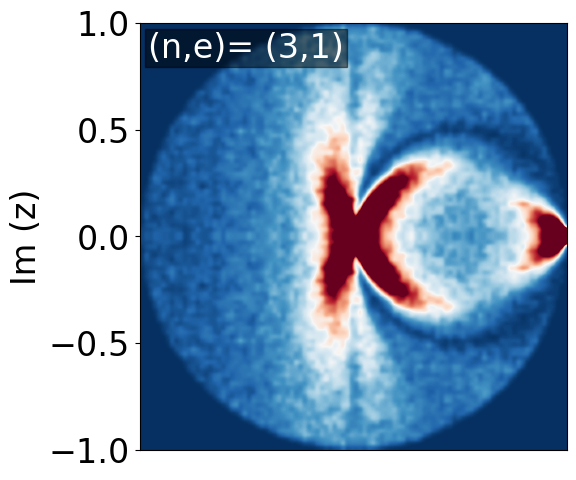

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


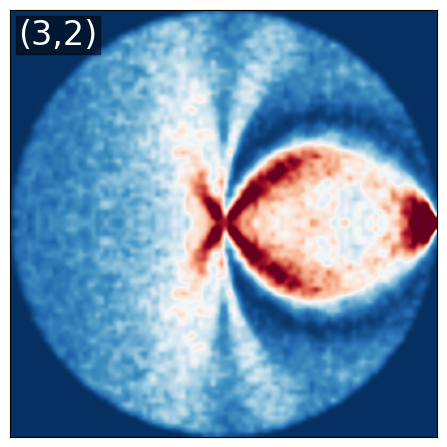

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


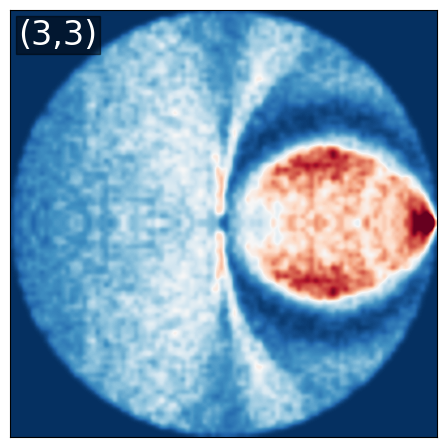

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


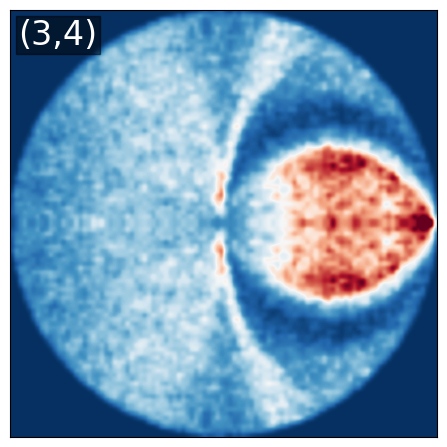

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


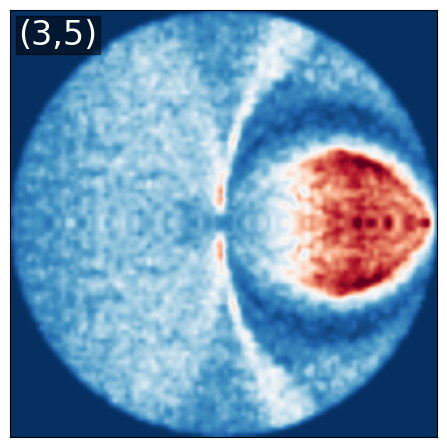

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


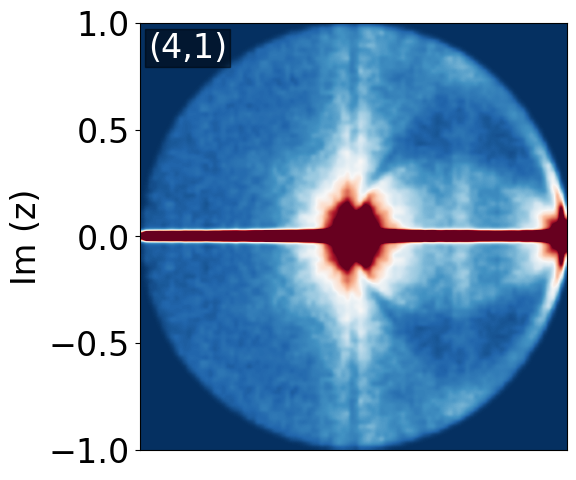

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


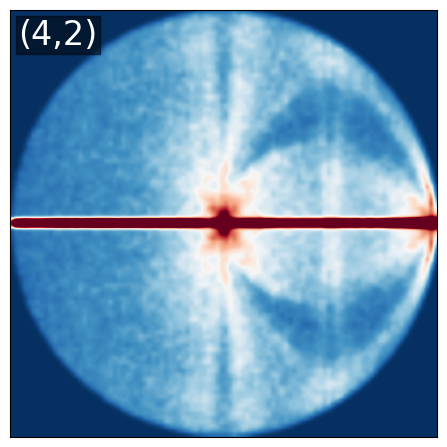

C:\Users\krist\AppData\Local\Temp\ipykernel_29208\264601642.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


In [ ]:
plot_csr("data/NE_AI_3_1.large", x_ticks=False, label = "(n,e)= (3,1)")
plot_csr("data/NE_AI_3_2.large", x_ticks=False, y_ticks=False, label = "(3,2)")
plot_csr("data/NE_AI_3_3.large", x_ticks=False, y_ticks=False, label = "(3,3)")
plot_csr("data/NE_AI_3_4.large", x_ticks=False, y_ticks=False, label = "(3,4)")
plot_csr("data/NE_AI_3_5.large", x_ticks=False, y_ticks=False, label = "(3,5)")

plot_csr("data/NE_AI_4_1.large", x_ticks=False, label = "(4,1)")
plot_csr("data/NE_AI_4_2.large", x_ticks=False, y_ticks=False, label = "(4,2)")
plot_csr("data/NE_AI_4_3.large", x_ticks=False, y_ticks=False, label = "(4,3)")
plot_csr("data/NE_AI_4_4.large", x_ticks=False, y_ticks=False, label = "(4,4)")
plot_csr("data/NE_AI_4_5.large", x_ticks=False, y_ticks=False, label = "(4,5)")

plot_csr("data/NE_AI_5_1.large",  label = "(5,1)")
plot_csr("data/NE_AI_5_2.large",  y_ticks=False, label = "(5,2)")
plot_csr("data/NE_AI_5_3.large",  y_ticks=False, label = "(5,3)")
plot_csr("data/NE_AI_5_4.large",  y_ticks=False, label = "(5,4)")
plot_csr("data/NE_AI_5_5.large",  y_ticks=False, label = "(5,5)")

## Generate and Save Colorbar

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

# 1. Create a figure and one axes for the colorbar
fig, ax = plt.subplots(figsize=(0.5, 6))  # tall & skinny

# 2. Define your colormap and data range
cmap = get_cmap("RdBu_r")
norm = Normalize(vmin=0, vmax=4)

# 3. Draw a vertical colorbar in that axes
cb = ColorbarBase(ax,
                  cmap=cmap,
                  norm=norm,
                  orientation="vertical")
cb.set_label("probability", fontsize=14)

# 4. (Optional) Tweak tick font sizes
ax.tick_params(labelsize=12)

# 5. Save just the colorbar
plt.savefig("figures/NE_AI_colorbar.svg", bbox_inches="tight")
plt.close(fig)

C:\Users\krist\AppData\Local\Temp\ipykernel_11236\343946188.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("RdBu_r")
